## Kundur example 12.6

In [1]:
from pydae.bmapu import bmapu_builder

In [2]:
grid = bmapu_builder.bmapu('k12p6_pss.json')
grid.checker()
grid.uz_jacs = True
grid.verbose = False
grid.build('k12p6')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pydae.ssa as ssa
from IPython.core.display import HTML,SVG
from pydae.svg_tools import svg
from pydae.plot_tools import set_style
colors = set_style(plt,style = "web")
%config InlineBackend.figure_formats = ['svg']

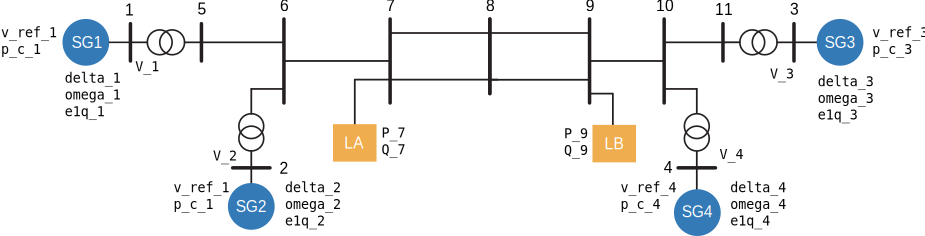

In [5]:
SVG('sp_k12p6.svg')

In [6]:
import k12p6 

### Initialization

In [7]:
model = k12p6.model()

# Cases:
# (ii) Thyristor exciter with a high transient gain   (K_stab=0, T_b=1)
# (iii)Thyristor exciter with a transient gain reduction (TGR) (K_stab=0, T_b=10)
# (iv) Thyristor exciter with high transient gain and PSS  (K_stab=20, T_b=1)

K_a = 50.0
D = 0.1
T_b = 1.0   # AVR lag time constant: (ii) T_b=1, (iii) T_b=10, (iv) T_b = 1
K_stab = 20 # PSS main gain: (ii) K_stab=0, (iii) K_stab=0, (iv) K_stab=20
lf = 1.0
params = {'P_7':-967e6*lf,'P_9':-1_767e6*lf,'Q_7':100e6*lf,'Q_9':250e6*lf,
                  'K_a_1':K_a,'K_a_2':K_a,'K_a_3':K_a,'K_a_4':K_a,
                  'K_stab_1':K_stab,'K_stab_2':K_stab,'K_stab_3':K_stab,'K_stab_4':K_stab, 
                  'T_b_1':T_b,'T_b_2':T_b,'T_b_3':T_b,'T_b_4':T_b,
                  'p_c_1':lf*700/900,'p_c_2':lf*700/900,'p_c_4':lf*700/900,
                  'D_1':D,'D_2':D,'D_3':D,'D_4':D}


model.ini(params,'xy_0.json')
#model.report_y()

repo = ''
for it in range(1,5):
    p = model.get_value(f'p_g_{it}')*model.get_value(f'S_n_{it}')
    q = model.get_value(f'q_g_{it}')*model.get_value(f'S_n_{it}')
    print(f"G{it}: P = {p/1e6:0.1f}   Q = {q/1e6:0.1f}  ")


G1: P = 698.7   Q = 142.2  
G2: P = 698.6   Q = 255.4  
G3: P = 720.3   Q = 133.5  
G4: P = 698.6   Q = 221.6  


### Small signal analysis

#### Eigenvalues

In [8]:
ssa.A_eval(model)
damp = ssa.damp_report(model)
damp.sort_values('Damp').round(3)

,Real,Imag,Freq.,Damp,Participation
Mode 22,-0.204,-3.786,0.603,0.054,"[delta_1, omega_1, e1q_1, e1d_1, v_r_1, x_ab_1..."
Mode 21,-0.204,3.786,0.603,0.054,"[delta_1, omega_1, e1q_1, e1d_1, v_r_1, x_ab_1..."
Mode 18,-0.640,-6.963,1.108,0.092,"[delta_3, omega_3, e1q_3, delta_4, omega_4]"
Mode 17,-0.640,6.963,1.108,0.092,"[delta_3, omega_3, e1q_3, delta_4, omega_4]"
Mode 20,-0.660,-6.798,1.082,0.097,"[delta_1, omega_1, delta_2, omega_2]"
Mode 19,-0.660,6.798,1.082,0.097,"[delta_1, omega_1, delta_2, omega_2]"
Mode 29,-0.472,1.138,0.181,0.383,"[delta_1, omega_1, e1q_1, e1d_1, v_r_1, x_ab_1..."
Mode 30,-0.472,-1.138,0.181,0.383,"[delta_1, omega_1, e1q_1, e1d_1, v_r_1, x_ab_1..."
Mode 28,-4.453,-0.932,0.148,0.979,"[delta_1, omega_1, e1q_1, e1d_1, v_r_1, x_ab_1..."
Mode 27,-4.453,0.932,0.148,0.979,"[delta_1, omega_1, e1q_1, e1d_1, v_r_1, x_ab_1..."


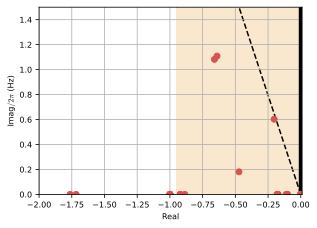

In [9]:
ssa.plot_eig(model.eigvalues,x_min=-2,x_max=0.01,y_min=0,y_max=1.5);

#### Participation factors

In [10]:
ssa.participation(model)['Mode 22'].abs().round(2).sort_values(ascending=False)

omega_1       0.16
omega_3       0.13
delta_1       0.12
omega_4       0.12
omega_2       0.11
delta_3       0.11
delta_4       0.10
delta_2       0.08
e1q_1         0.04
e1q_2         0.03
x_gov_1_1     0.02
e1d_3         0.01
x_gov_1_2     0.01
e1q_3         0.01
e1q_4         0.01
e1d_4         0.01
x_gov_1_4     0.01
x_gov_1_3     0.01
x_ab_4        0.00
v_r_4         0.00
xi_v_3        0.00
xi_v_4        0.00
x_gov_2_4     0.00
x_wo_pss_4    0.00
x_34_pss_3    0.00
x_12_pss_3    0.00
x_wo_pss_3    0.00
x_12_pss_4    0.00
x_34_pss_4    0.00
x_gov_2_3     0.00
xi_v_1        0.00
x_ab_3        0.00
v_r_3         0.00
x_gov_2_1     0.00
x_wo_pss_1    0.00
x_12_pss_1    0.00
x_34_pss_1    0.00
x_ab_1        0.00
e1d_2         0.00
v_r_2         0.00
x_ab_2        0.00
xi_v_2        0.00
x_gov_2_2     0.00
x_wo_pss_2    0.00
x_12_pss_2    0.00
x_34_pss_2    0.00
v_r_1         0.00
e1d_1         0.00
xi_freq       0.00
Name: Mode 22, dtype: float64

### Mode shapes

In [11]:
ssa.shape2df(model).loc['Mode 22'][[f'omega_{it+1}' for it in range(4)]]

omega_1    0.16∠-97.3
omega_2    0.11∠-90.9
omega_3    0.04∠ 93.3
omega_4    0.09∠ 96.1
Name: Mode 22, dtype: object

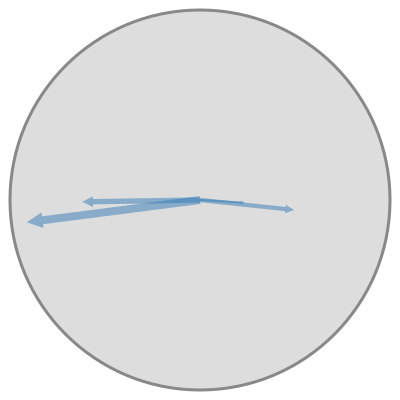

In [12]:
svg_string = ssa.plot_shapes(model,mode='Mode 22',states=[f'omega_{it+1}' for it in range(4)])
SVG(svg_string)

### Time domain simulation

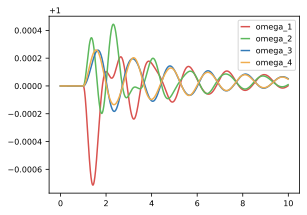

In [13]:
model = k12p6.model()

model.ini(params,'xy_0.json')
model.run(1.0,{'v_ref_1': 1.03})
model.run(10.0,{'v_ref_1': 1.03*1.05});
model.post();

fig,axes = plt.subplots()
axes.plot(model.Time,model.get_values('omega_1'),label='omega_1')
axes.plot(model.Time,model.get_values('omega_2'),label='omega_2')
axes.plot(model.Time,model.get_values('omega_3'),label='omega_3')
axes.plot(model.Time,model.get_values('omega_4'),label='omega_4')
axes.legend()

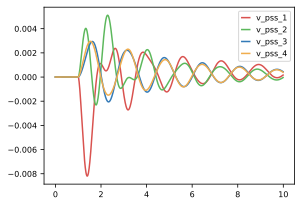

In [14]:
fig,axes = plt.subplots()
axes.plot(model.Time,model.get_values('v_pss_1'),label='v_pss_1')
axes.plot(model.Time,model.get_values('v_pss_2'),label='v_pss_2')
axes.plot(model.Time,model.get_values('v_pss_3'),label='v_pss_3')
axes.plot(model.Time,model.get_values('v_pss_4'),label='v_pss_4')
axes.legend()